## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

## Data Preprocessing

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
def preprocessing(train):
    print("shape of the dataset \n ", train.shape)
    print("********************************************************")
    print("information of the dataset \n ", train.info())
    print("********************************************************")
    print("description of the dataset \n", train.describe())
    print("********************************************************")
    print("null values \n ", train.isnull().sum())
    print("duplicated values \n ",train.duplicated())
    

In [5]:
preprocessing(train)

shape of the dataset 
  (8523, 12)
********************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4

In [6]:
preprocessing(test)

shape of the dataset 
  (5681, 11)
********************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
informati

### Treating Missing Values


<AxesSubplot:>

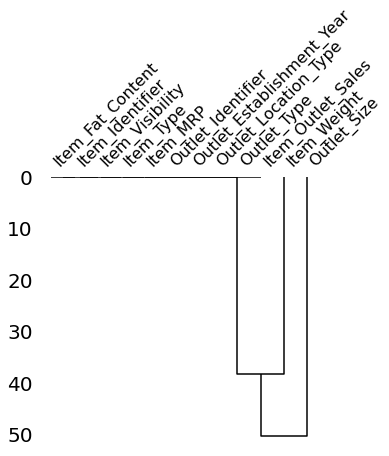

In [7]:
## Visualizing missing no

import missingno as msno

msno.dendrogram(train,figsize=(5,5))

<AxesSubplot:>

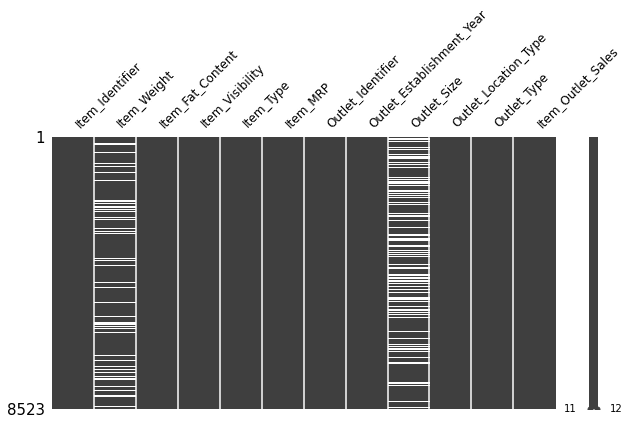

In [8]:
msno.matrix(train,figsize=(10,5), fontsize=12)

<AxesSubplot:>

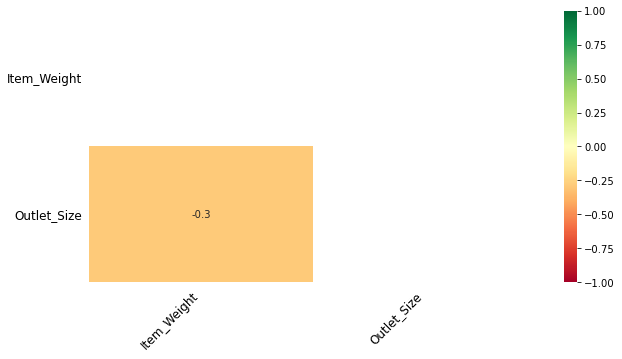

In [9]:
msno.heatmap(train,cmap="RdYlGn", figsize=(10,5), fontsize=12)

In [10]:
## Treating numerical missing values
from sklearn.impute import SimpleImputer
def missingvalue(train):
    train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)
    train['Outlet_Size'].fillna(method="ffill",inplace=True)
    return train.isnull().sum()

In [11]:
missingvalue(train)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
missingvalue(test)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [13]:
def item_fat(train):
    train['Item_Fat_Content'].replace(to_replace = ["LF", "low fat"], value = ["Low Fat", "Low Fat"], inplace=True)
    train['Item_Fat_Content'].replace(to_replace = ["reg"], value = ["Regular"], inplace = True)
    return train["Item_Fat_Content"].value_counts()

In [14]:
item_fat(train)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
item_fat(test)

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

## Data Visualization

In [16]:
Item_Outlet = train

In [17]:
import datetime
Item_Outlet["Outlet_Establishment_Year"] = pd.to_datetime(Item_Outlet.Outlet_Establishment_Year, format='%Y')

<AxesSubplot:title={'center':'Distribution of Item Fat Content'}, ylabel='Item_Fat_Content'>

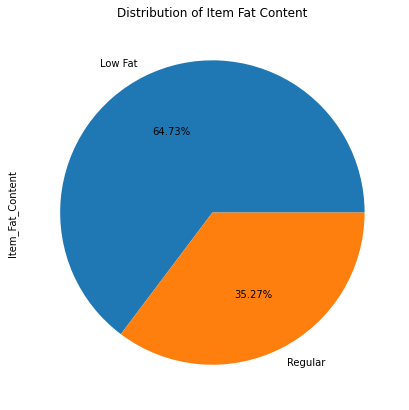

In [18]:
plt.figure(figsize=(7,7))
plt.title("Distribution of Item Fat Content")
train["Item_Fat_Content"].value_counts().plot(kind="pie",autopct='%1.2f%%')

<AxesSubplot:title={'center':'Distribution of Item Type'}, ylabel='Item_Type'>

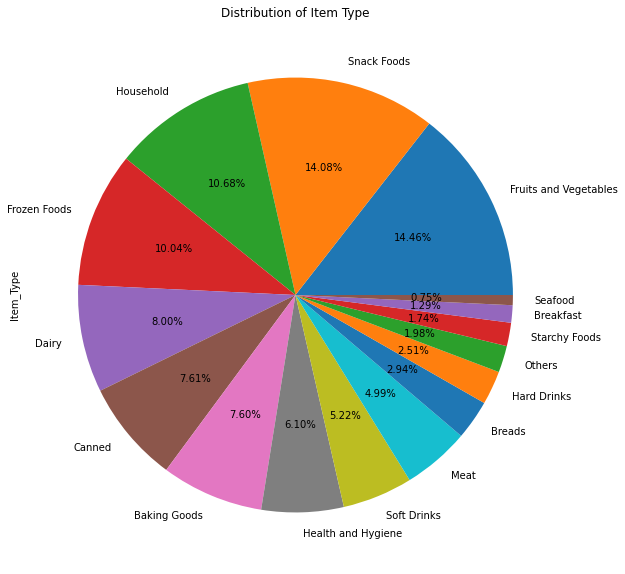

In [19]:
plt.figure(figsize=(10,10))
plt.title("Distribution of Item Type")
train["Item_Type"].value_counts().plot(kind="pie",autopct='%1.2f%%')

Text(0.5, 1.0, 'Item Type - MRP')

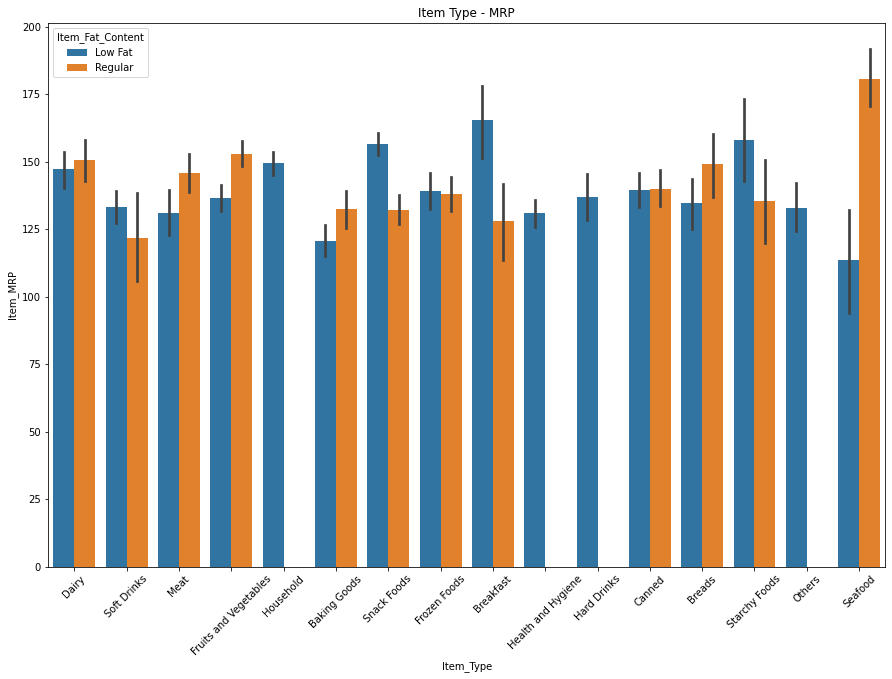

In [20]:
plt.figure(figsize = (15,10))
sns.barplot(x = "Item_Type",y = "Item_MRP", hue = "Item_Fat_Content",data = train)
plt.xticks(rotation=45)
plt.title("Item Type - MRP")

<AxesSubplot:title={'center':'Distribution of Outlet Location Type'}, ylabel='Outlet_Location_Type'>

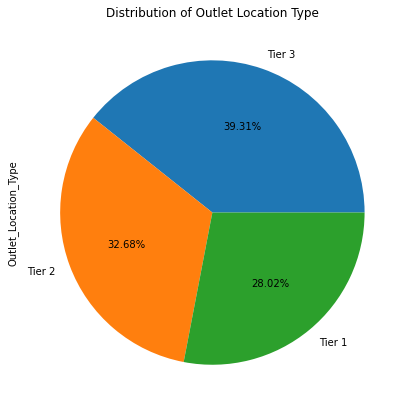

In [21]:
plt.figure(figsize=(7,7))
plt.title("Distribution of Outlet Location Type")
train["Outlet_Location_Type"].value_counts().plot(kind="pie",autopct='%1.2f%%')

<AxesSubplot:title={'center':'Distribution of Outlet Size'}, ylabel='Outlet_Size'>

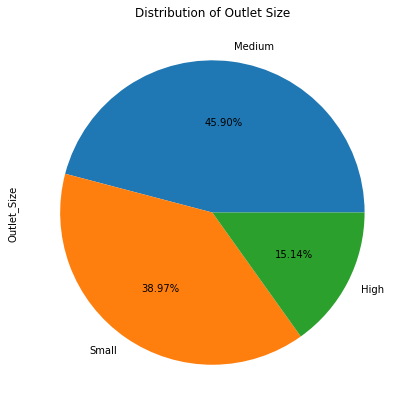

In [22]:
plt.figure(figsize=(7,7))
plt.title("Distribution of Outlet Size")
train["Outlet_Size"].value_counts().plot(kind="pie",autopct='%1.2f%%')

<AxesSubplot:title={'center':'Distribution of Outlet Type'}, ylabel='Outlet_Type'>

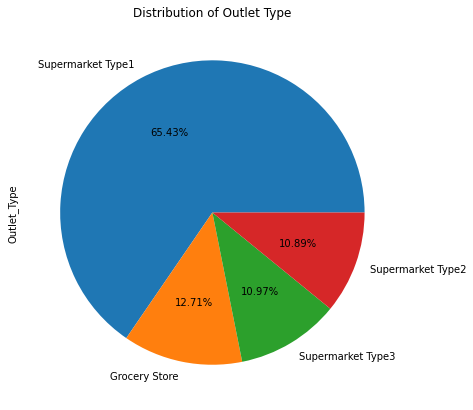

In [23]:
plt.figure(figsize=(7,7))
plt.title("Distribution of Outlet Type")
train["Outlet_Type"].value_counts().plot(kind="pie",autopct='%1.2f%%')

Text(0.5, 1.0, 'Outlet size per year')

<Figure size 1080x720 with 0 Axes>

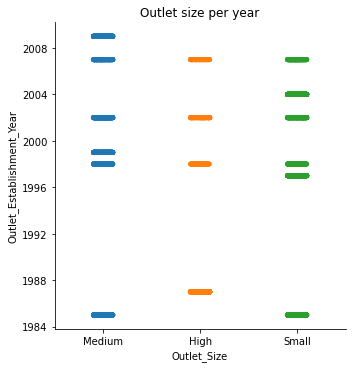

In [24]:
plt.figure(figsize = (15,10))
sns.catplot(y = "Outlet_Establishment_Year",x = "Outlet_Size",data = Item_Outlet)
plt.title("Outlet size per year")

Text(0.5, 1.0, 'Outlet Location per year')

<Figure size 1080x720 with 0 Axes>

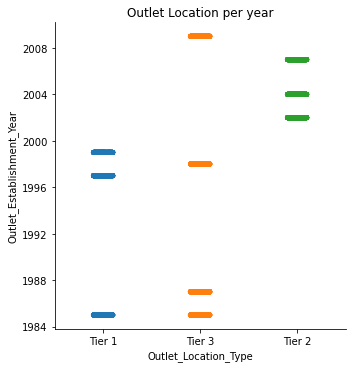

In [25]:
plt.figure(figsize = (15,10))
sns.catplot(y = "Outlet_Establishment_Year",x = "Outlet_Location_Type",data = Item_Outlet)
plt.title("Outlet Location per year")

Text(0.5, 1.0, 'Outlet type per year')

<Figure size 1080x720 with 0 Axes>

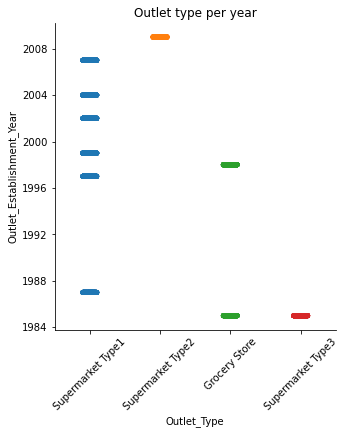

In [26]:
plt.figure(figsize = (15,10))
sns.catplot(y = "Outlet_Establishment_Year",x = "Outlet_Type",data = Item_Outlet)
plt.xticks(rotation = 45)
plt.title("Outlet type per year")

Text(0.5, 1.0, 'Outlet Type - Sales')

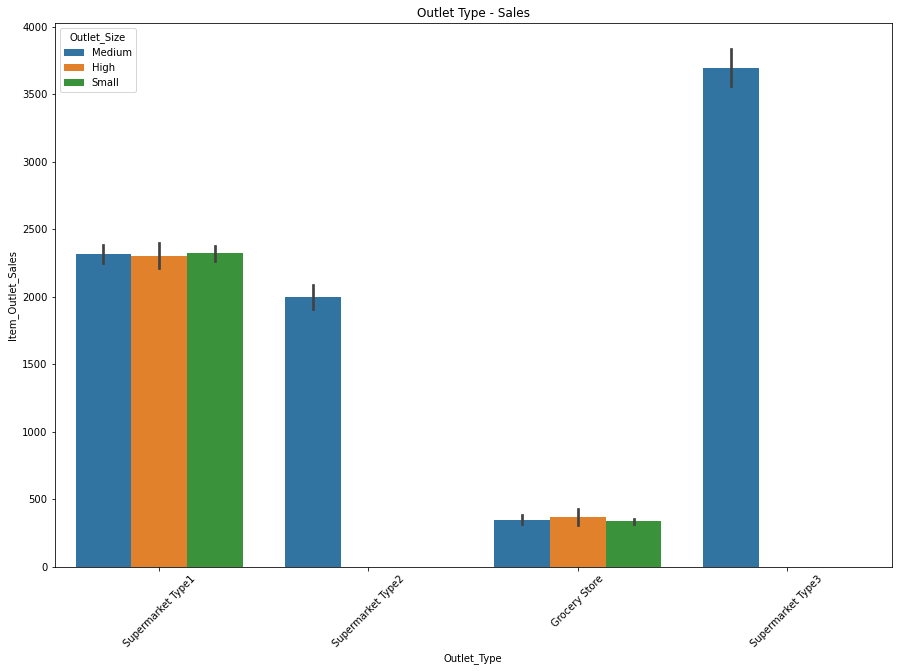

In [27]:
plt.figure(figsize = (15,10))
sns.barplot(x = "Outlet_Type",y = "Item_Outlet_Sales", hue = "Outlet_Size",data = Item_Outlet)
plt.xticks(rotation=45)
plt.title("Outlet Type - Sales")

Text(0.5, 1.0, 'MRP VS Sales')

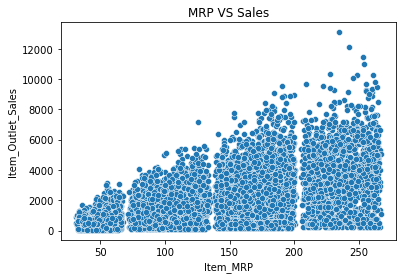

In [28]:
sns.scatterplot(x = "Item_MRP",y = "Item_Outlet_Sales",data = Item_Outlet)
plt.title("MRP VS Sales")

Text(0.5, 1.0, 'Item Type - Sales')

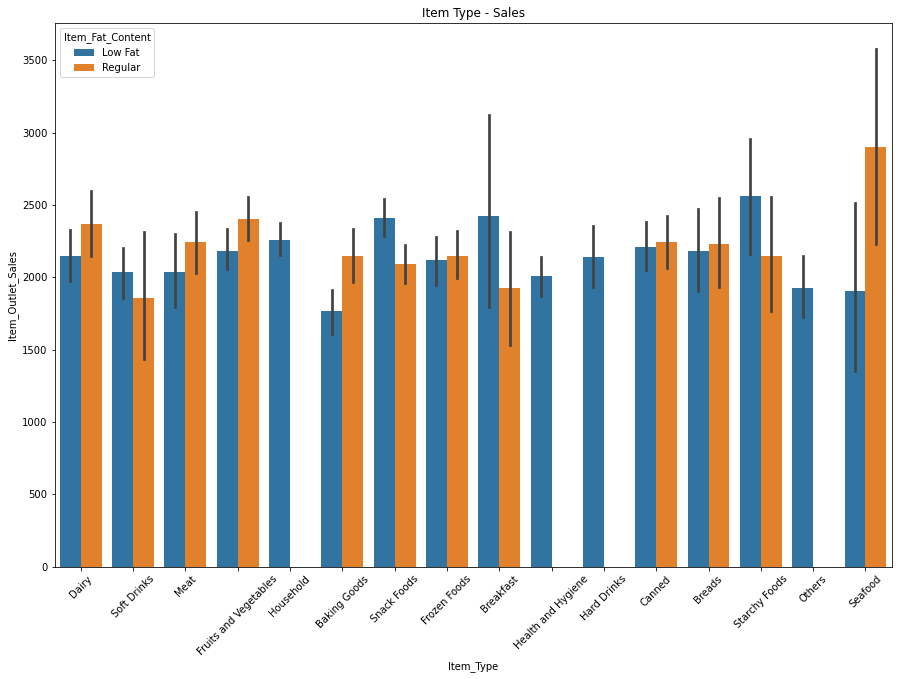

In [29]:
plt.figure(figsize = (15,10))
sns.barplot(x = "Item_Type",y = "Item_Outlet_Sales", hue = "Item_Fat_Content",data = Item_Outlet)
plt.xticks(rotation=45)
plt.title("Item Type - Sales")

Text(0.5, 1.0, 'Outlet Type - Sales')

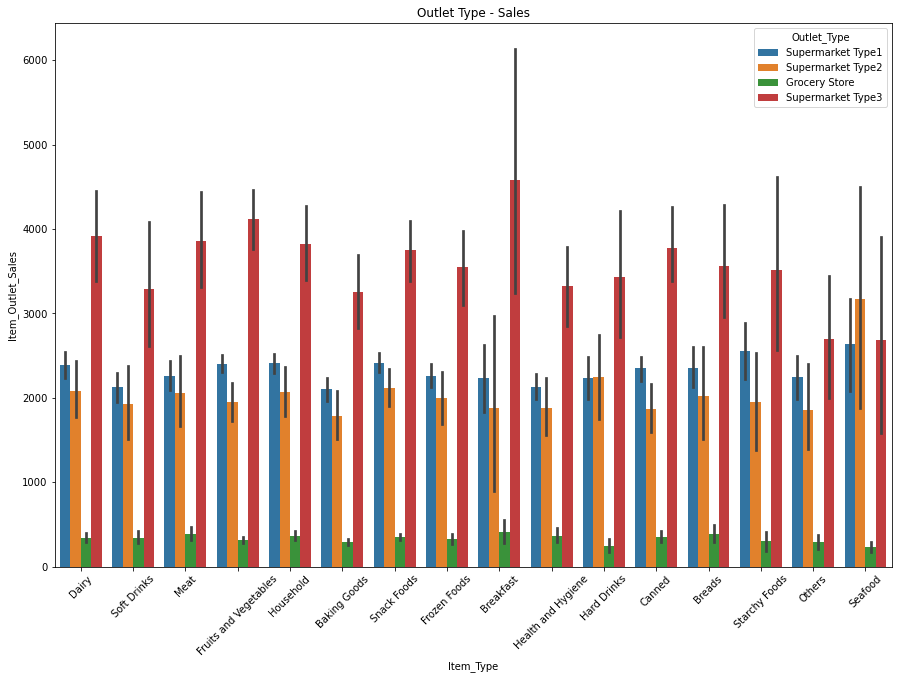

In [30]:
plt.figure(figsize = (15,10))
sns.barplot(hue = "Outlet_Type",y = "Item_Outlet_Sales", x = "Item_Type",data = Item_Outlet)
plt.xticks(rotation=45)
plt.title("Outlet Type - Sales")

## Data Encoding

In [31]:
train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], inplace = True, axis = 1)
test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], inplace = True, axis = 1)

In [32]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [33]:
def categorical_numerical(train):
    categorical_var = [i for i in train.columns if train[i].dtypes=='object']
    for z in categorical_var:
        print(train[z].name,':',train[z].unique())
    numerical_var = train[[i for i in train.columns if train[i].dtypes !='object']]
    print("*************************************************************************")
    print("numerical variables \n",numerical_var)

In [34]:
categorical_numerical(train)

Item_Fat_Content : ['Low Fat' 'Regular']
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Size : ['Medium' 'High' 'Small']
Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
*************************************************************************
numerical variables 
       Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
0           9.300         0.016047  249.8092          3735.1380
1           5.920         0.019278   48.2692           443.4228
2          17.500         0.016760  141.6180          2097.2700
3          19.200         0.000000  182.0950           732.3800
4           8.930         0.000000   53.8614           994.7052
...           ...              ...       ...                ...
8518

In [35]:
categorical_numerical(test)

Item_Fat_Content : ['Low Fat' 'Regular']
Item_Type : ['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
Outlet_Size : ['Medium' 'Small' 'High']
Outlet_Location_Type : ['Tier 1' 'Tier 2' 'Tier 3']
Outlet_Type : ['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']
*************************************************************************
numerical variables 
       Item_Weight  Item_Visibility  Item_MRP
0       20.750000         0.007565  107.8622
1        8.300000         0.038428   87.3198
2       14.600000         0.099575  241.7538
3        7.315000         0.015388  155.0340
4       12.695633         0.118599  234.2300
...           ...              ...       ...
5676    10.500000         0.013496  141.3154
5677     7.600000         0.142991  169.1448
5678    10.000000         0.073529  118.7440
567

In [36]:
train['Item_Fat_Content']=train['Item_Fat_Content'].map({'Low Fat':0,'Regular':1,'LF':2,'reg':3,'low fat':4})

train['Item_Type']= train['Item_Type'].map({'Fruits and Vegetables':0,'Snack Foods':1,'Household':2,'Frozen Foods':3,'Dairy':4,'Canned':5,'Baking Goods':6,'Health and Hygiene':7,'Soft Drinks':8,'Meat':9,'Breads':10,'Hard Drinks':11,'Others':12,'Starchy Foods':13,'Breakfast':14,'Seafood':15})

train['Outlet_Size']=train['Outlet_Size'].map({'Medium':0,'Small':1,'High':2})

train['Outlet_Type']= train['Outlet_Type'].map({'Supermarket Type1':0,'Grocery Store':1,'Supermarket Type3':2,'Supermarket Type2':3})

train['Outlet_Location_Type']= train['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})

In [37]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,0,0,0,3735.1380
1,5.92,1,0.019278,8,48.2692,0,2,3,443.4228
2,17.50,0,0.016760,9,141.6180,0,0,0,2097.2700
3,19.20,1,0.000000,0,182.0950,0,2,1,732.3800
4,8.93,0,0.000000,2,53.8614,2,2,0,994.7052


In [38]:
test['Item_Fat_Content']=test['Item_Fat_Content'].map({'Low Fat':0,'Regular':1,'LF':2,'reg':3,'low fat':4})

test['Item_Type']= test['Item_Type'].map({'Fruits and Vegetables':0,'Snack Foods':1,'Household':2,'Frozen Foods':3,'Dairy':4,'Canned':5,'Baking Goods':6,'Health and Hygiene':7,'Soft Drinks':8,'Meat':9,'Breads':10,'Hard Drinks':11,'Others':12,'Starchy Foods':13,'Breakfast':14,'Seafood':15})

test['Outlet_Size']=test['Outlet_Size'].map({'Medium':0,'Small':1,'High':2})

test['Outlet_Type']= test['Outlet_Type'].map({'Supermarket Type1':0,'Grocery Store':1,'Supermarket Type3':2,'Supermarket Type2':3})

test['Outlet_Location_Type']= test['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})

In [39]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,1,107.8622,0,0,0
1,8.300000,1,0.038428,4,87.3198,0,1,0
2,14.600000,0,0.099575,12,241.7538,0,2,1
3,7.315000,0,0.015388,1,155.0340,0,1,0
4,12.695633,1,0.118599,4,234.2300,0,2,2


In [40]:
columns = ["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Type","Outlet_Location_Type","Item_Weight","Item_Outlet_Sales","Item_MRP"]
for i in train.columns[:]:
    train[i] = (train[i]-train[i].min())/(train[i].max()-train[i].min())
columns = ["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Type","Outlet_Location_Type","Item_Weight","Item_MRP"]
for i in test.columns[:]:
    test[i] = (test[i]-test[i].min())/(test[i].max()-test[i].min())

In [41]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.964275,0.0,0.023374,0.066667,0.323413,0.0,0.0,0.000000
1,0.222983,1.0,0.118737,0.266667,0.235849,0.0,0.5,0.000000
2,0.598095,0.0,0.307674,0.800000,0.894140,0.0,1.0,0.333333
3,0.164335,0.0,0.047548,0.066667,0.524488,0.0,0.5,0.000000
4,0.484706,1.0,0.366458,0.266667,0.862069,0.0,1.0,0.666667


## Data Splitting

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
X = train.drop(['Item_Outlet_Sales'], axis = 1)
Y_train = train['Item_Outlet_Sales']
x_test = test

In [44]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y_train, test_size = 0.25, random_state = 0)

## Model Building

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [46]:
def get_model(input_shape):
    
    model=Sequential([
        Dense(256, activation='relu',input_shape = (8,), name="Dense_Layer_1"),
        Dense(256, activation='relu', name="Dense_Layer_2"),
        Dense(256, activation='relu', name="Dense_Layer_3"),
        Dense(1, activation = 'linear', name="Output_Layer")
    ])
    
    
    model.compile(optimizer = 'adam',
                 loss=['mse'],
                 metrics = ['mae'])
    
    return model

In [47]:
model = get_model(8,)
#model.build(X_train[0].shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_Layer_1 (Dense)       (None, 256)               2304      
                                                                 
 Dense_Layer_2 (Dense)       (None, 256)               65792     
                                                                 
 Dense_Layer_3 (Dense)       (None, 256)               65792     
                                                                 
 Output_Layer (Dense)        (None, 1)                 257       
                                                                 
Total params: 134,145
Trainable params: 134,145
Non-trainable params: 0
_________________________________________________________________


In [48]:
def get_checkpoint_best_only():
    
    checkpoint_path_best_only = 'checkpoints_best_only/checkpoint'
    checkpoints_best_only = ModelCheckpoint(filepath=checkpoint_path_best_only,
                                           save_weights_only=True,
                                           monitor='val_loss',
                                           frequency="epoch",
                                           save_best_only=True,
                                            verbose=1)
    return checkpoints_best_only



def get_early_stopping():

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=7,
                                                     verbose=1)
    return early_stopping

In [49]:
checkpoint_best_only = get_checkpoint_best_only()
early_stopping = get_early_stopping()
callbacks = [checkpoint_best_only, early_stopping]

In [50]:
def train_model(model, train_data, train_targets, batch_size, epochs):
    
    history = model.fit(train_data, 
                        train_targets,
                        batch_size=batch_size,
                        epochs = epochs,
                        validation_data = (X_valid,y_valid),
                       callbacks = callbacks)
    return history

In [51]:
history = train_model(model, X_train, y_train, 100, 25)

Epoch 1/25
55/64 [========================>.....] - ETA: 0s - loss: 0.0116 - mae: 0.0792
Epoch 1: val_loss improved from inf to 0.00980, saving model to checkpoints_best_only\checkpoint
64/64 [==============================] - 2s 17ms/step - loss: 0.0112 - mae: 0.0779 - val_loss: 0.0098 - val_mae: 0.0749
Epoch 2/25
56/64 [=========================>....] - ETA: 0s - loss: 0.0085 - mae: 0.0669
Epoch 2: val_loss improved from 0.00980 to 0.00832, saving model to checkpoints_best_only\checkpoint
64/64 [==============================] - 1s 10ms/step - loss: 0.0084 - mae: 0.0665 - val_loss: 0.0083 - val_mae: 0.0656
Epoch 3/25
63/64 [============================>.] - ETA: 0s - loss: 0.0080 - mae: 0.0650
Epoch 3: val_loss improved from 0.00832 to 0.00753, saving model to checkpoints_best_only\checkpoint
64/64 [==============================] - 1s 10ms/step - loss: 0.0080 - mae: 0.0650 - val_loss: 0.0075 - val_mae: 0.0624
Epoch 4/25
59/64 [==========================>...] - ETA: 0s - loss: 0.0072

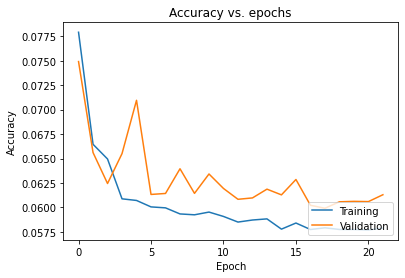

In [52]:
try:
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
except KeyError:
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

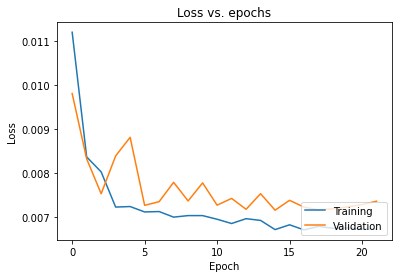

In [53]:
try:
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
except KeyError:
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [54]:
model_predictions=model.predict(x_test)

178/178 [==============================] - 0s 2ms/step


In [55]:
sample['Item_Outlet_Sales']=model_predictions

In [56]:
sub=pd.DataFrame({'Item_Identifier':sample["Item_Identifier"],"Outlet_Identifier":sample["Outlet_Identifier"],"Item_Outlet_Sales":sample['Item_Outlet_Sales']})

In [57]:
sub.to_csv('submission.csv',index=False)
pd.read_csv('submission.csv')

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,0.138053
1,FDW14,OUT017,0.119209
2,NCN55,OUT010,0.043284
3,FDQ58,OUT017,0.162401
4,FDY38,OUT027,0.379377
...,...,...,...
5676,FDB58,OUT046,0.179206
5677,FDD47,OUT018,0.225378
5678,NCO17,OUT045,0.142284
5679,FDJ26,OUT017,0.301990
